In [ ]:
# O'Reilly Bayes 
# Chapter 4 - EStimating Proportions

# Remember I graduated college in 2004, which means the last time I did stats was 2000 maybe.
# My old employer wouldn't pay for tech refresh, but did pay for languages.

In [ ]:
# The Euro problem
# When spun on edge 250 times, a Belgian one-Euro coin came up heads 140 times and tails 110.
# "It looks very suspicious to me," said Barry Blight, a statistics lecturer at the London 
# School of Economics.  "If the coin were unbiased, the chance of getting a result as extreme
# as that would be less than 7%."
# Does the data give evidence that the coin is biased rather than fair?


In [1]:
# Binomial distribution. For any value of k from 0 to n, the term "n choose k" is the binomial
# coefficient. We could evaluate this expression ourselves, but we can also use the SciPy function
# binom.pmf.  For example,if we flip a coin n=2 times and the probability of heads is p =0.5, 
# here's the probability of getting k = 1 heads.

from scipy.stats import binom

n = 2
p = 0.5
k = 1

binom.pmf(k,n,p)

0.5000000000000002

In [19]:
import numpy as np
ks = np.arange(n+1)

ps = binom.pmf(ks, n, p)
print(ks)
print(ps)

[0 1 2]
[0.25 0.5  0.25]


In [3]:
from empiricaldist import Pmf

pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [4]:
def make_binomial(n,p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks,n,p)
    return Pmf(ps,ks)

In [5]:
pmf_k = make_binomial(n=250, p=0.5)

In [7]:
def make_binomial(n,p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

pmf_k = make_binomial(n=250, p=0.5)

pmf_k
    

,probs
0,5.527148e-76
1,1.381787e-73
2,1.720325e-71
3,1.422135e-69
4,8.781685e-68
...,...
246,8.781685e-68
247,1.422135e-69
248,1.720325e-71
249,1.381787e-73


In [ ]:
# What will I do with my Joker's card.  What I wanted to do but my previous employer
# wouldn't let me. I have spent my entire career in DoD acquisition before IC. IC has been 
# nothing but atrophying skills.

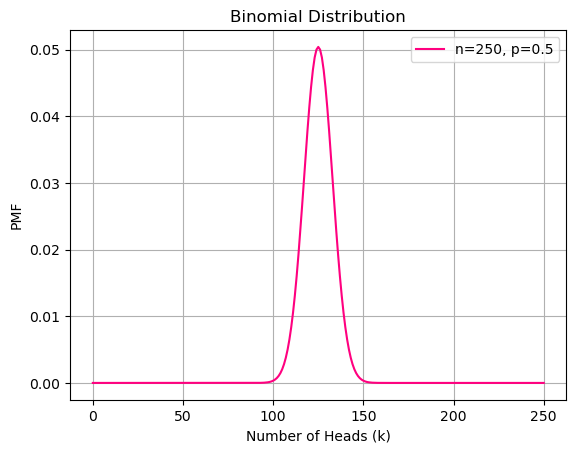

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(pmf_k, color = "#FF007F", label='n=250, p=0.5')

ax.set(xlabel='Number of Heads (k)', ylabel='PMF',
       title='Binomial Distribution')

ax.legend()

ax.grid()
plt.show()

In [11]:
pmf_k.max_prob()

125

In [26]:
pmf_k[125]

0.050412213147309655

In [27]:
pmf_k[140]

0.008357181724918204

In [ ]:
# In the article, MacKay quotes, the statistician says "If the coin were unbiased, the chance 
# of getting a result as extreme as that would be less than 7%."

In [30]:
def prob_ge(pmf, threshold):
    ge = (pmf.qs >= threshold)
    total = pmf[ge].sum()
    return total

In [33]:
# probability of getting 140 heads or more
prob_ge(pmf_k, 140)

0.03321057562002163

In [32]:
pmf_k.prob_ge(140)

0.03321057562002163

In [ ]:
#The resulting 3.3% is about half of the 7% because the under 110 heads were not counted.
# The other side of the curve.  This shows that extreme outcomes are unlikely if the coin is fair.

In [34]:
# the left "tail"
pmf_k.prob_le(110)

0.03321057562002164

In [ ]:
# Bayesian Estimation
